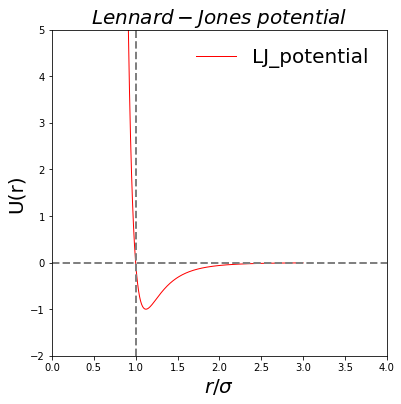

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import Boltzmann


#Plot LJ potential (Dimensionless) 
r = np.linspace(0.01,3.0,num=500)
sigma0 = 1 #dimensionless
epsilon0 = 1 #dimensionless


temp = sigma0 / r
lj_potential = 4 * epsilon0 * ((temp**12) - (temp**6))


plt.figure(figsize=[6,6])
plt.xlim([0.0,4.0])
plt.ylim([-2.0,5.0])

plt.plot(r,lj_potential,'r-',linewidth=1,label=r"LJ_potential") 
plt.title(r"$Lennard-Jones\; potential$",fontsize=20)

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.axhline(0, color='grey',linestyle='--',linewidth=2)
plt.axvline(1, color='grey',linestyle='--',linewidth=2)

plt.ylabel(r"U(r)",fontsize=20)
plt.xlabel(r"$r/\sigma$",fontsize=20)
plt.legend(frameon=False,fontsize=20)

In [2]:
#calculate force from LJ potential
def calculate_force(r, epsilon, sigma):
               
    force = 48*epsilon*(sigma**12 / r**13) - 24*epsilon*(sigma**6 / r**7)

    return force

#calculate the acceleration between two paritcles

def calculate_acc(x, L):
    
    accel = np.zeros((x.size, x.size))
    for i in range(0, x.size - 1):
        for j in range(i + 1, x.size):
            distance = x[j] - x[i]
            distance_abs = np.sqrt(distance * distance)
            force_scalar = calculate_force(distance_abs, epsilon, sigma)
            force_x = force_scalar * distance / distance_abs
            accel[i, j] = force_x / mass
            accel[j, i] = - force_x / mass
    acc = np.sum(accel, axis=0)
    return acc
#velocity verlet for position

def verlet_x(x, v, a, dt, L):
    
    x_new = x + v*dt + 0.5*a*dt*dt
    x_new = x_new % L
    position = x_new
    
    return position

#velocity verlet for velocity
def verlet_v(v, a, a_new, dt):
    
    v_new = v + (a+a_new)*dt/2
   
    return v_new    

#calculate initial velocity
def init_velocity(N, T):
   
    #R = np.random.rand(N) - 0.5
    R = np.array([-0.5, 0.5])
    initial_vel = R * np.sqrt (k_b* T / mass)
    
    return initial_vel



Acceleration of atom1 = 1.451e-04 eV/Åamu
Acceleration of atom2 = -1.451e-04 eV/Åamu
Initial Velocity of atom1 = -1.272e-02 eVs/Åamu
Initial Velocity of atom2 = 1.272e-02 eVs/Åamu
Initial Temperature = 300K
Initial Position of atom1 = 1Å
Initial Position of atom2 = 5Å


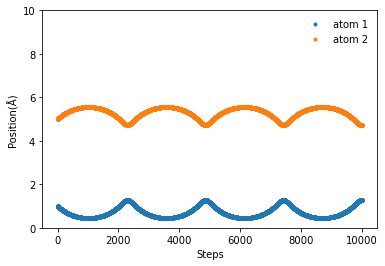

In [10]:
#Parameters

mass =39.948 #mass of argon, amu
k_b = 1.380649e-23 / 1.602e-19 #Boltzmann
initial_temp = 300 #Initial Temperature
sigma=3.4  #Å
epsilon = 0.01042332#eV  / equal to 1.67e-21 J


#main Loop
N_steps = 10000
dt = 0.1
x = np.array([1, 5]) #Initial Position
L = 10

positions = np.zeros((N_steps, x.size))
v = init_velocity(x.size, initial_temp)
a = calculate_acc(x, L)
a_init = a
v_init = v
x_init = x


for i in range(N_steps):
    x = verlet_x(x, v, a, dt, L)
    a_new = calculate_acc(x, L)
    v = verlet_v(v, a, a_new, dt)
    a = np.array(a_new)
    positions[i, :] = x
    
#Print Result & Plot
print('Acceleration of atom1 = {:.3e} eV/Åamu'.format(a_init[0]))
print('Acceleration of atom2 = {:.3e} eV/Åamu'.format(a_init[1]))    

print('Initial Velocity of atom1 = {:.3e} eVs/Åamu'.format(v_init[0]))
print('Initial Velocity of atom2 = {:.3e} eVs/Åamu'.format(v_init[1]))

print('Initial Temperature = {:}K'.format(initial_temp))
print('Initial Position of atom1 = {:}Å'.format(x_init[0]))
print('Initial Position of atom2 = {:}Å'.format(x_init[1]))
      
%matplotlib inline
for i in range(positions.shape[1]):
    plt.plot(positions[:, i], '.', label='atom {}'.format(i+1))
plt.xlabel(r'Steps')
plt.ylabel(r'Position(Å)')
plt.ylim(0, L)
plt.legend(frameon=False)
plt.show()